# Seaborn CheatSheet and Review #  
http://seaborn.pydata.org

In [71]:
import seaborn as sns
from scipy import stats
sns.set() #over-rides the matplot and provides better aesthetics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips') #seaborn dataset included in library. Sample pandas dataset

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distribution Plot ##

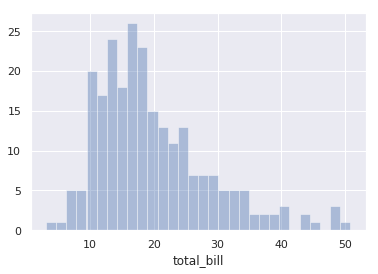

In [17]:
sns.distplot(tips['total_bill'],kde=False,bins = 30)

***Joint Plot***

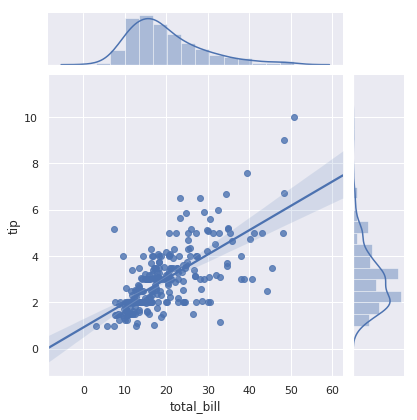

In [32]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') #reg, kde, etc.


***Pair Plot***

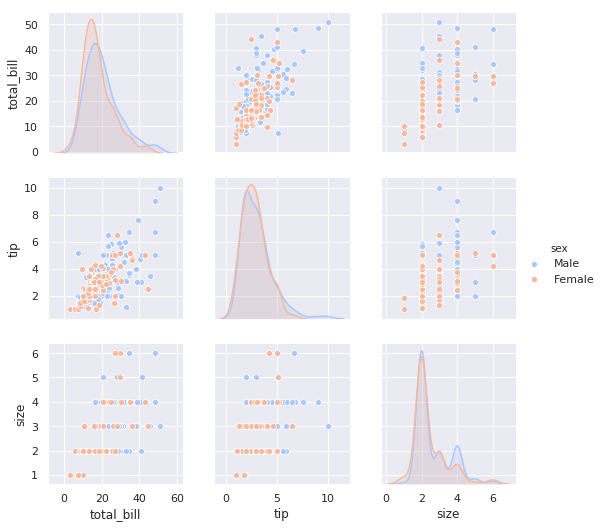

In [37]:
sns.pairplot(tips,hue='sex',palette='coolwarm') #hue for categorical columns not numerical

***Rug Plots***

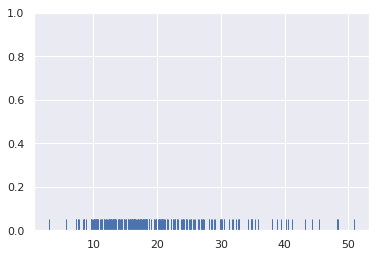

In [38]:
sns.rugplot(tips['total_bill'])

### KDE - Kernel Density Estimation Plots ###

Related to rug-plots. See Normal Distribution

(0, 1)

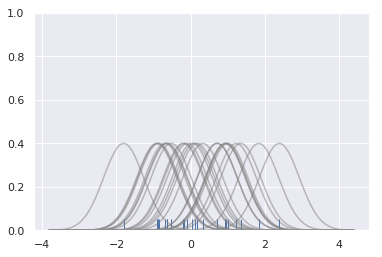

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create a dataset
dataset=np.random.randn(25)

#Create a rugplot

sns.rugplot(dataset)

#setup the x axis for the plot
x_min=dataset.min()-2
x_max=dataset.max()+2

#100 equally spaced points for x_min and x_max

x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

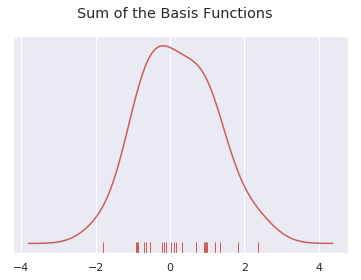

In [44]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

## Categorical Plots ##

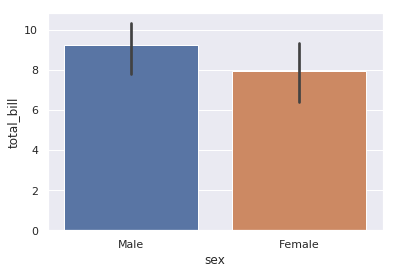

In [48]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

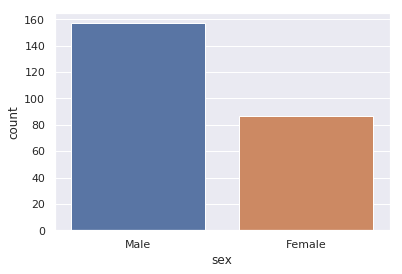

In [50]:
sns.countplot(x='sex',data=tips)

***Boxplots and Violin plots***

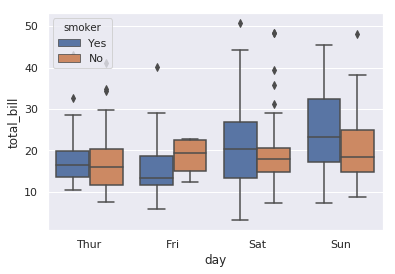

In [52]:
sns.boxplot(x='day',y='total_bill',data=tips,hue="smoker")

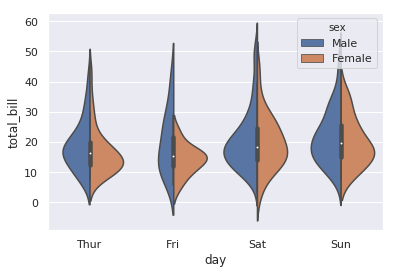

In [5]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

***Strip Plot***

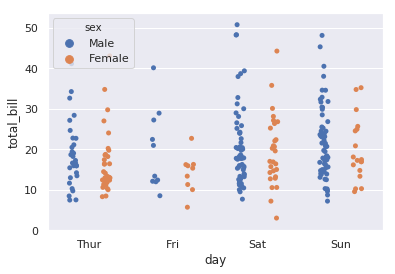

In [12]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True) #dodge formerly known as split

***Swarm Plot***  
Very similar to strip-plot but without overlap. Caveat: These don't scale well to large datasets

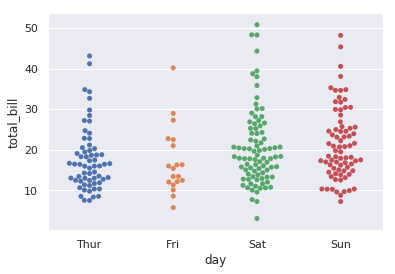

In [14]:
sns.swarmplot(x='day',y='total_bill',data=tips)

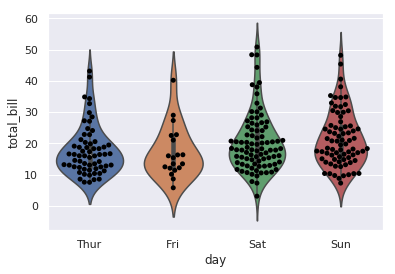

In [15]:
#combined with violin-plot
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

***Cat Plot***  
Categorical Plot

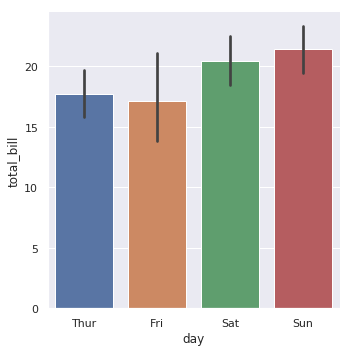

In [17]:
sns.catplot(x='day',y='total_bill',data=tips,kind='bar')

## Matrix Plots ##

In [18]:
#import another dataset
flights=sns.load_dataset('flights')

In [21]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Need the indexes and columns to co-relate for heat-map to be able to display. In other words, rows must have the same as columns. This can be done via `pd.corrs()` or via a `pd.pivot_table`. So need data in matrix form

In [22]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [25]:
flights.corr()

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


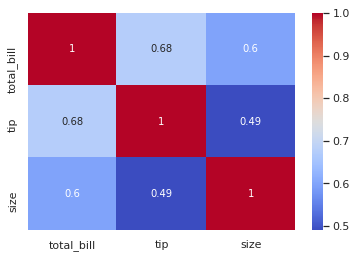

In [29]:
tc=tips.corr()
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [37]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


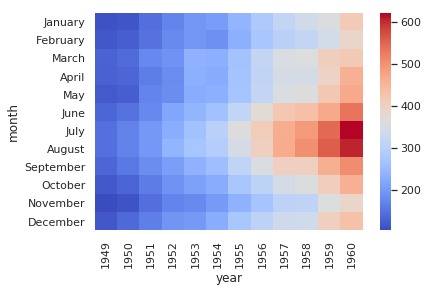

In [46]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')
sns.heatmap(fp,cmap='coolwarm')

***Cluster Map***  
Uses heirarchal data to display 

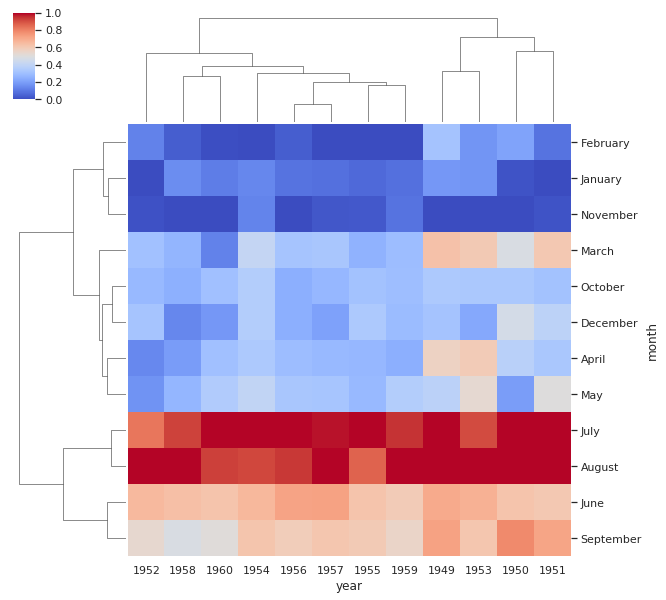

In [48]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

## Grids ##

In [49]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
iris.iloc[:,-1].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

*** PairGrid ***

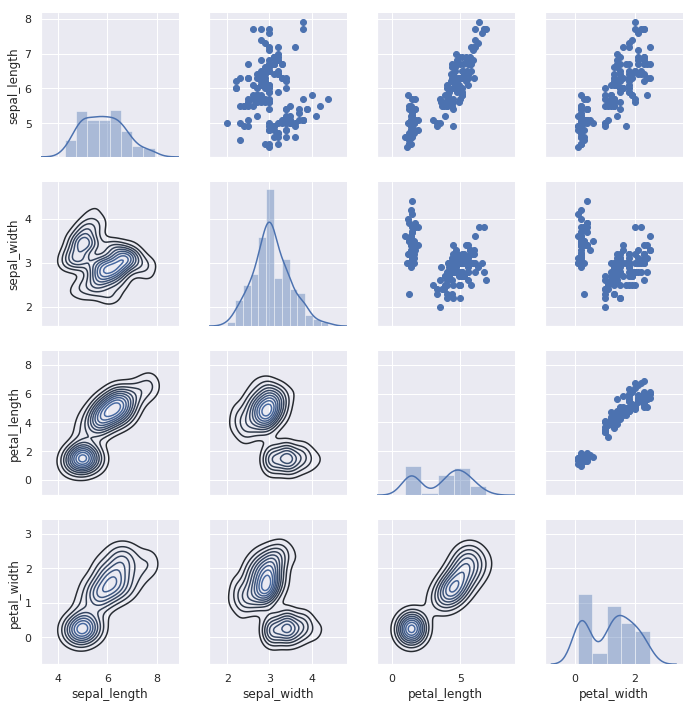

In [73]:
g=sns.PairGrid(iris)   #alternative is pairplot but PairGrid gives more control
#g.map(plt.scatter)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

***Facet Grid***

In [76]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


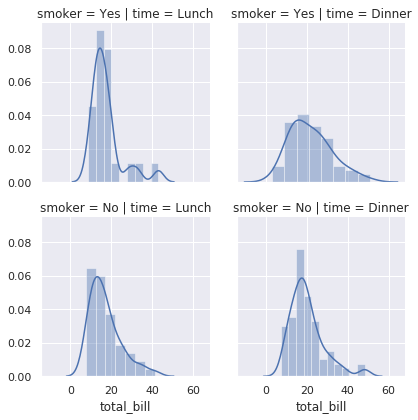

In [79]:
g=sns.FacetGrid(tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

## Regression Plots ##  

Display Linear Models with Seaborn

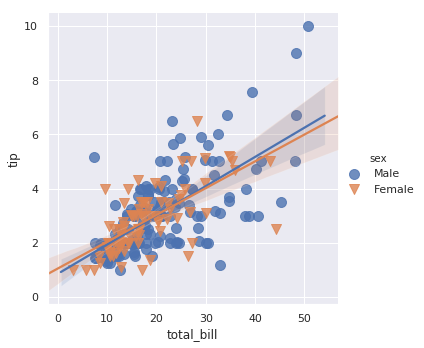

In [86]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100}) #scatter will change the size

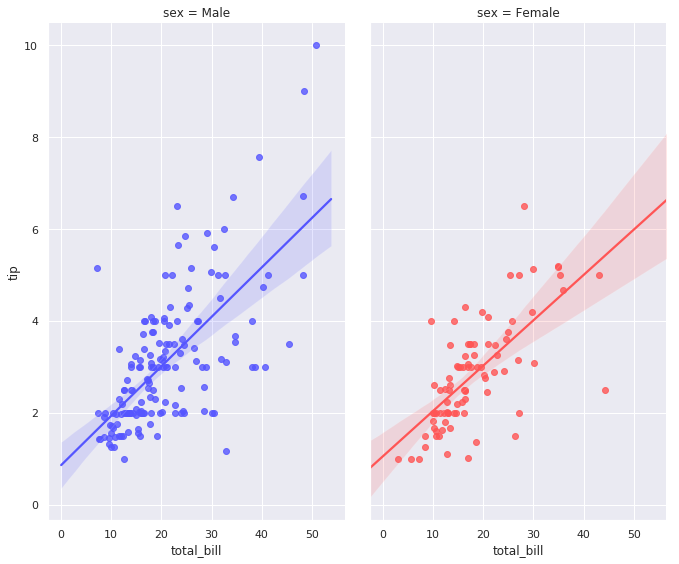

In [96]:
#separation by categories
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',hue='sex',aspect=0.6,height=8,palette='seismic')

## Style and Colour ##

Google: matplotlib colomap for more `palette` options

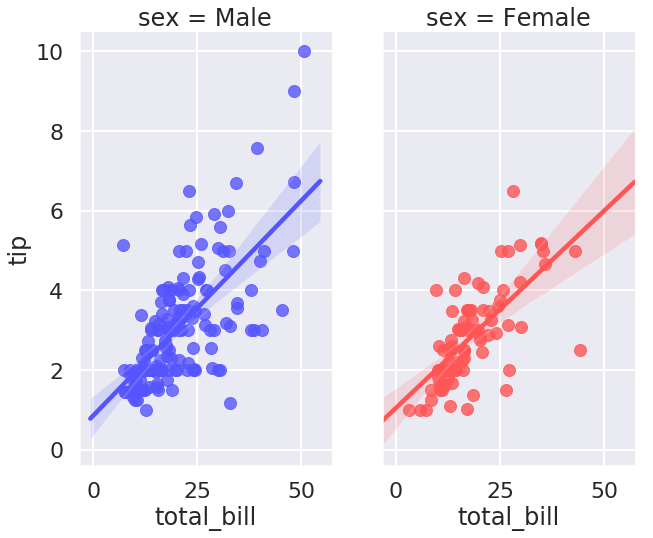

In [100]:
sns.set_context('poster') #add option ,font_scale= if not satisfied with font-size
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',hue='sex',aspect=0.6,height=8,palette='seismic')